# Procesamiento del lenguaje natural

### Expresiones regulares

* Expresiones con una sintaxis especial
* Podemos trabajar con ellas debido a que tienen un patrón

In [1]:
# libería de expresiones regulares
import re

#### Python `re` modulos:
* `re`module
* `split`: split a string on regex
* `findall`: find all patterns in a string
* `search`: search for a pattern
* `match`: match an entire string or substring based on a pattern

En los comandos primero el patrón y luego la frase

#### Patrones comunes:

    pattern   matches    example
       \w+       word      'Magic'
       \d        digit        9
       \s        space       ''
       .*       wildcare    'username29'
      + or     greedy match 'aaaaaa'
      \S        not space   'not_space'
      [a-z]  lowercase group 'abdcefg'

**nota**: wildcare nos permite hacer un 'match' con cualquier símbolo o letra.

In [5]:
# re.match 'matchea entre dos expresiones
print(re.match('abc','abcdef'))

<_sre.SRE_Match object; span=(0, 3), match='abc'>


In [23]:
# findall - encuentra todos los patrones en una string
my_string = 'Hola! Mi nombre es Lidia.'

PATTERN = r'\s+' # espacios (Hay 4 espacios)
print(re.findall(PATTERN,my_string))

PATTERN = r'\w+' # palabras
print(re.findall(PATTERN,my_string))

PATTERN = r'[a-z]' # letras minúsculas (encuentra las letras minúsculas)
print(re.findall(PATTERN,my_string))

PATTERN = r'\w' # letras (encuentra letras)
print(re.findall(PATTERN,my_string))

# el patrón es que muestre todas las palabras que empiezan por mayúsculas
capitalized_words = r'[A-Z]\w+'
my_string = 'Estoy volando a Abu Dhabi, qué guay!'

print(re.findall(capitalized_words,my_string))

# Escribir todos los dígitos de mi cadena de texto
my_string = 'Tengo 25 años y el vuelo a Abu Dhabi tarda 6 horas.'
digits = r'\d+'
print(re.findall(digits,my_string))

[' ', ' ', ' ', ' ']
['Hola', 'Mi', 'nombre', 'es', 'Lidia']
['o', 'l', 'a', 'i', 'n', 'o', 'm', 'b', 'r', 'e', 'e', 's', 'i', 'd', 'i', 'a']
['H', 'o', 'l', 'a', 'M', 'i', 'n', 'o', 'm', 'b', 'r', 'e', 'e', 's', 'L', 'i', 'd', 'i', 'a']
['Estoy', 'Abu', 'Dhabi']
['25', '6']


In [21]:
# split - Nos separa la frase en función de los patrones que le digamos

# el patrón que le acabamos de decir es que nos separe por los signos de puntuación .,? ó !
my_string = 'Hola. Mi nombre es Lidia. Tengo 25 años.'
sentence_endings = r'[.?!]'

print(re.split(sentence_endings,my_string))

# el patrón es que separe por espacios
spaces = r'\s+'
my_string = 'Estoy volando a Abu Dhabi, qué guay!'

print(re.split(spaces,my_string))


['Hola', ' Mi nombre es Lidia', ' Tengo 25 años', '']
['Estoy', 'volando', 'a', 'Abu', 'Dhabi,', 'qué', 'guay!']


**Nota**: Es importante que cuando hagamos el patrón pongamos `r`delante para asegurarnos que nuestros patrones son interpretados de la manera que queremos. 
Por ejemplo, `\n` en Python se utiliza para indicar una nueva línea, pero si se usa el prefijo `r` será interpretado como una cadena de texto.

#### Diferencia entre *re.search()* y *re.match()*

* `match` intentará hacer un 'match' a una cadena de texto desde el principio.
* `search` hará una búsqueda a traves de toda la cadena de texto para buscar opciones de 'match'

Si se necesita encontrar un patrón pero no necesariamente tiene que estar a principio de palabra o de cadena de texto se recomienda usar `search`.

En caso de que tu quieras una composición específica de una cadena de texto completa o al menos un patrón inicial se recomienda usar `match`.

In [29]:
# aquí hacen lo mismo 
print('utilizando match',re.match('abc','abcde'))
print('utilizando search',re.search('abc','abcde'))

utilizando match <_sre.SRE_Match object; span=(0, 3), match='abc'>
utilizando search <_sre.SRE_Match object; span=(0, 3), match='abc'>


In [30]:
# aquí match no encuentra nada puesto que la expresión que buscamos se encuentra a mitad de palabra
print('utilizando match',re.match('cd','abcde'))
print('utilizando search',re.search('cd','abcde'))

utilizando match None
utilizando search <_sre.SRE_Match object; span=(2, 4), match='cd'>


In [35]:
example ="I didn't notice I left the tickets in the restaurant. I'm sorry..."

# Utilizamos search
match = re.search('tickets',example)
print(match)
#Dónde empieza y dónde acaba mi match
print(match.start(),match.end())

<_sre.SRE_Match object; span=(27, 34), match='tickets'>
27 34


### Introducción a la Tokenización

* Convertir una cadena de texto o un documento en pequeños 'chunks'.
* Es el paso previo a hacer NLP
* Se pueden utilizar reglas propias utilizando expresiones regulares
* Ejemplos:
            - Separar palabras o frases
            - Separar signos de puntuación
            - Separar los hastags en un tweet
            

Se utilizará la librería `nltk` natural language toolkit.

In [27]:
# librería de nltk
from nltk.tokenize import word_tokenize

# ejemplo tokenización en inglés
word_tokenize("I don't like fish and chips")

['I', 'do', "n't", 'like', 'fish', 'and', 'chips']

**Tokenización**

- Facilita el mapeo en una parte del discurso
- Encuentra 'matchs' con palabras comunes
- Eliminamos palabras no deseadas

Si nosotros tokenizamos la frase "I don't like Sam's shoes", podemos ver claramente una negación con el 'not' y una posesión con 's. Esos indicadores nos pueden ayudar a determinar el significado de un texto simple.

Derivados de nltk:
* `sent_tokenize`: tokeniza documento en frases 
* `regexp_tokenize`:  tokeniza documentos o frases según una expresión regular
* `TweetTokenizer`: especial para la tokenización de los tweets, permitiendo separar hastags, menciones y los signos de exclamación

In [37]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [40]:
example = 'Hi Jack! I would like to invite you to my home tonight.'

# Tokenizamos el documento en frases
# comando sent
sentences = sent_tokenize(example)
print('TOKENIZAR DOCUMENTO EN FRASES')
print(sentences)

print('=============================')

# Tokenizamos las frases
# comando word
tokenized_sent = word_tokenize(sentences[0])
print('TOKENIZAMOS FRASE 1')
print(tokenized_sent)


tokenized_sent2 = word_tokenize(sentences[1])
print('TOKENIZAMOS FRASE 2')
print(tokenized_sent2)

TOKENIZAR DOCUMENTO EN FRASES
['Hi Jack!', 'I would like to invite you to my home tonight.']
TOKENIZAMOS FRASE 1
['Hi', 'Jack', '!']
TOKENIZAMOS FRASE 2
['I', 'would', 'like', 'to', 'invite', 'you', 'to', 'my', 'home', 'tonight', '.']


#### Tokenización avanzada

* Representamos 'OR' con el símbolo | 
* Podemos representar un grupo de patrones utilizando ()
* Puedes definir un carácter explícito utilizando []



|   pattern   |matches      | example    |
|---------------|----------------|----------------|
| [A-Za-z]+    |  upper and lowecase English alphabet  | 'ABCDEfjhk' |
| [0-9]    | numbers from 0 to 9  |  9 |             |
| [A-Za-z\-\.]+|  upper and lowercase English alphabet, - and .          | 'My-website.com'            | 
|(a-z) | a,- and z|'a-z'
|(\s+l,) |spaces or comma |','|


In [42]:
# patrón
match_digits_and_words = ('(\d+|\w+)')
re.findall(match_digits_and_words, 'he has 11 cats!')

['he', 'has', '11', 'cats']

In [49]:
# Ejemplo para profundizar
my_string = "SOLDIER #1:Found them? In Mercea? The coconut's tropical!"

from nltk.tokenize import regexp_tokenize

# una palabra que acabe con una exclamación o interrogación
pattern1 = r'\w+(\?!)' 
print(regexp_tokenize(my_string,pattern1))

pattern2 = r'(\w+|#\d|\?|!)'
print(regexp_tokenize(my_string,pattern2))

[]
['SOLDIER', '#1', 'Found', 'them', '?', 'In', 'Mercea', '?', 'The', 'coconut', 's', 'tropical', '!']


In [52]:
# ejemplos con tweets
from nltk.tokenize import TweetTokenizer

tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

# Regexp Tokenize
# Definimos un patrón para encontrar los hastags seguido de una palabra
pattern1 = r'#\w+'

# Utilizamos el patrón en primer tweet
print('The first tweet')
print(regexp_tokenize(tweets[0],pattern1))

print('========================================')

# Escribir un patrón que nos muestre las menciones y los hastags
pattern2 = r'([#|@]\w+)'

# lo utilizamos en el ultimo tweet de mi lista
print('The last tweet')
print(regexp_tokenize(tweets[-1],pattern2))

print('==================================')
# Tweet Tokenizer
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print('All Tweets')
print(all_tokens)


The first tweet
['#nlp', '#python']
The last tweet
['@datacamp', '#nlp', '#python']
All Tweets
[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


#### Ejemplo avanzado

In [53]:
import matplotlib.pyplot as plt

scene_one ="SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!"

# echar un vistazo al texto
scene_one

'SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!'

In [54]:
# Separamos el texto en frases, nos damos cuenta de que 
# tiene \n como separador por tanto:
lines = scene_one.split('\n')
print(lines)

['SCENE 1: [wind] [clop clop clop] ', 'KING ARTHUR: Whoa there!  [clop clop clop] ', 'SOLDIER #1: Halt!  Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!']


In [55]:
# Para analizar el texto nos interesa eliminar quién habla
# Reemplazamos los nombres por vacío
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern,'',l) for l in lines]
print(lines)

['SCENE 1: [wind] [clop clop clop] ', ' Whoa there!  [clop clop clop] ', ' Halt!  Who goes there?', ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!']


In [56]:
# Ahora que tenemos el texto sin speakers y en frases, tokenizamos cada frase
# Ojo! se puede hacer con word_tokenizer también!
pattern = '\w+'

tokenized_lines = []
for s in lines:
    x = regexp_tokenize(s,pattern)
    tokenized_lines.append(x)

print(tokenized_lines)

[['SCENE', '1', 'wind', 'clop', 'clop', 'clop'], ['Whoa', 'there', 'clop', 'clop', 'clop'], ['Halt', 'Who', 'goes', 'there'], ['It', 'is', 'I', 'Arthur', 'son', 'of', 'Uther', 'Pendragon', 'from', 'the', 'castle', 'of', 'Camelot', 'King', 'of', 'the', 'Britons', 'defeator', 'of', 'the', 'Saxons', 'sovereign', 'of', 'all', 'England']]


[6, 5, 4, 25]


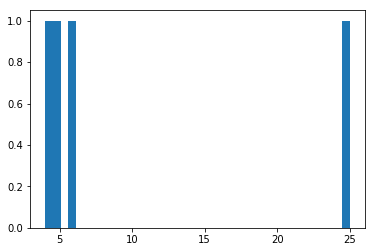

In [57]:
# Hacemos una frecuencia de la LONGITUD de la frase
line_num_words = [len(t_line) for t_line in tokenized_lines]
print(line_num_words)

# Plot de un histograma con la frecuencia de la longitud
plt.hist(line_num_words,bins=40)
plt.show()